## Two-class classification and Linear SVMs

In [11]:
import sklearn
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [91]:
X = df.iloc[0:100, 4].values
y= np.where(X=="Iris-setosa", -1, 1)

In [40]:
X[0:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [41]:
X[55:60]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [42]:
y[0:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [43]:
y[52:55]

array([1, 1, 1])

In [92]:
data = df.iloc[0:100, [0,2]].values

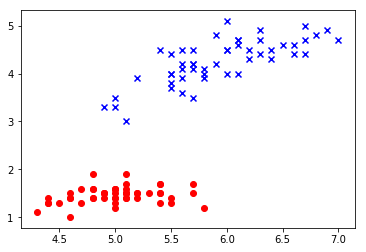

In [93]:
plt.scatter(data[:50, 0], data[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(data[50:100, 0], data[50:100, 1], color='blue', marker='x', label='versicolor')
plt.show()

In [100]:
def plot_decision_regions(data, y, classifier, resolution=0.02):
    """
    A function that plots decision regions based on "Implementing a perceptron algorithm in Python by Raschka et al.
    """
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #meshgrid
    x1min, x1max = data[:,0].min()-1, data[:, 0].max()+1
    x2min, x2max = data[:,1].min()-1, data[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=data[y==cl,0], y=data[y==cl, 1], 
                   alpha=0.8, c=cmap(idx), 
                   marker=markers[idx], label=cl)
    plt.scatter(x=[6.0], y=[1.8], 
               alpha=0.8, marker='v', c='cyan')

### Linear SVM classification

In [64]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(data, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
clf.predict([[5.0, 1.0]])

array([-1])

## Plotting the decision surface

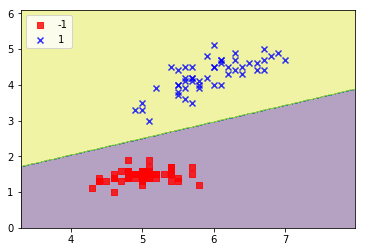

In [75]:
plot_decision_regions(data, y, clf)
plt.legend(loc='upper left')
plt.show()

In [101]:
def add_attack_point(data, y, attack_point):
    """
    Add a new attack point to the dataset
    """
    return np.concatenate((data, attack_point)), np.concatenate((y, np.array([1])))

In [102]:
new_data, y_new = add_attack_point(data, y, [[4.0, 2.0]])

In [103]:
clf.fit(new_data, y_new)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

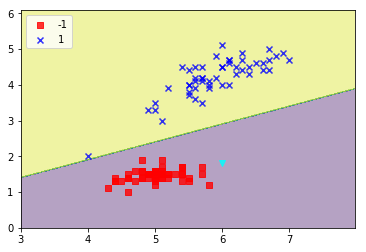

In [104]:
plot_decision_regions(new_data, y_new, clf)
plt.legend(loc='upper left')
plt.show()

In [110]:
new_data_2, y_new_2 = add_attack_point(new_data, y_new, [[6.0, 2.0]])

In [111]:
clf.fit(new_data_2, y_new_2)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

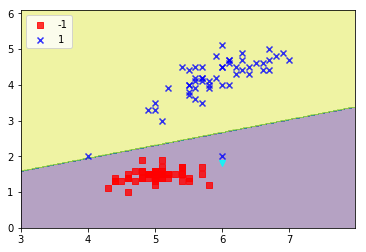

In [112]:
plot_decision_regions(new_data_2, y_new_2, clf)
plt.legend(loc='upper left')
plt.show()

In [114]:
x1_new = [6.0, 6.1, 6.05, 6.08, 6.09]
x2_new = [1.5, 1.4, 1.55, 1.8, 1.75]
new_vals = map(list, zip(x1_new, x2_new))
new_vals[0:2]

[[6.0, 1.5], [6.1, 1.4]]

In [117]:
for val in new_vals:
    print val
    new_data_2, y_new_2 = add_attack_point(new_data_2, y_new_2, [val])

[6.0, 1.5]
[6.1, 1.4]
[6.05, 1.55]
[6.08, 1.8]
[6.09, 1.75]


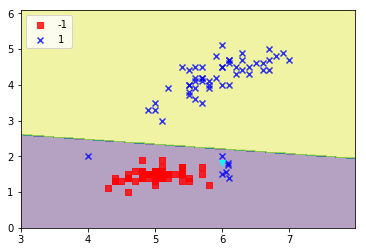

In [118]:
clf.fit(new_data_2, y_new_2)
plot_decision_regions(new_data_2, y_new_2, clf)
plt.legend(loc='upper left')
plt.show()

In [119]:
x1_new = [5.5, 5.6, 5.559, 5.7, 5.45]
x2_new = [1.5, 1.4, 1.55, 1.8, 1.75]
new_vals = map(list, zip(x1_new, x2_new))
new_vals[0:2]

[[5.5, 1.5], [5.6, 1.4]]

In [120]:
for val in new_vals:
    print val
    new_data_2, y_new_2 = add_attack_point(new_data_2, y_new_2, [val])

[5.5, 1.5]
[5.6, 1.4]
[5.559, 1.55]
[5.7, 1.8]
[5.45, 1.75]


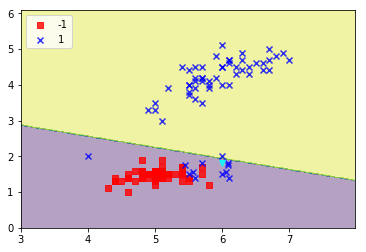

In [122]:
clf.fit(new_data_2, y_new_2)
plot_decision_regions(new_data_2, y_new_2, clf)
plt.legend(loc='upper left')
plt.show()

In [123]:
x1_new = [5.5, 5.6, 5.559, 5.7, 5.45]
x2_new = [2.1, 2.105, 2.110, 2.089, 2.0]
new_vals = map(list, zip(x1_new, x2_new))
new_vals[0:2]

[[5.5, 2.1], [5.6, 2.105]]

In [124]:
for val in new_vals:
    print val
    new_data_2, y_new_2 = add_attack_point(new_data_2, y_new_2, [val])

[5.5, 2.1]
[5.6, 2.105]
[5.559, 2.11]
[5.7, 2.089]
[5.45, 2.0]


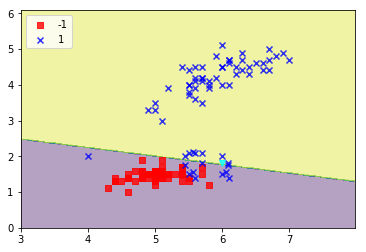

In [125]:
clf.fit(new_data_2, y_new_2)
plot_decision_regions(new_data_2, y_new_2, clf)
plt.legend(loc='upper left')
plt.show()

In [ ]:
clf.predict()